In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(4867)

In [2]:
'''
import csv

with open('log.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('log.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('title', 'intro'))
        writer.writerows(lines)
df = pd.read_csv('data_banknote_authentication.csv')
X = df.iloc[:,:4]
t = df.iloc[:,4]

from sklearn.model_selection import train_test_split
X2, X_test, t2, t_test = train_test_split(X, t, test_size = 1/4)
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X2, t2, test_size = 1/5)
'''

'\nimport csv\n\nwith open(\'log.txt\', \'r\') as in_file:\n    stripped = (line.strip() for line in in_file)\n    lines = (line.split(",") for line in stripped if line)\n    with open(\'log.csv\', \'w\') as out_file:\n        writer = csv.writer(out_file)\n        writer.writerow((\'title\', \'intro\'))\n        writer.writerows(lines)\ndf = pd.read_csv(\'data_banknote_authentication.csv\')\nX = df.iloc[:,:4]\nt = df.iloc[:,4]\n\nfrom sklearn.model_selection import train_test_split\nX2, X_test, t2, t_test = train_test_split(X, t, test_size = 1/4)\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, t_train, t_test = train_test_split(X2, t2, test_size = 1/5)\n'

In [3]:
#importing the txt data file
#loc = "C:\\Users\\NG\\Downloads\\data_banknote_authentication.txt"
data_banknote_authentication = np.genfromtxt("data_banknote_authentication.txt", delimiter=',')
print(type(data_banknote_authentication))
np.random.shuffle(data_banknote_authentication)
data_banknote_authentication = data_banknote_authentication.T

<class 'numpy.ndarray'>


In [4]:
#Total number of rows
N = data_banknote_authentication.shape[1]
print(N)

1372


In [5]:
#Splitting training:validation:test set into 60:20:20
ntrain = int(N*0.6)
nt = int(N*0.2)
nvalid = ntrain+nt

In [6]:
train_split = data_banknote_authentication[:, :ntrain]
validation_split = data_banknote_authentication[:, ntrain:nvalid]
test_split = data_banknote_authentication[:, nvalid:N]

In [7]:
#Function to split data in parameters and labels set

In [8]:
def split_data(data):
    X = np.delete(data, (4), axis=0)
    t = data[4]
    return (X, t)

In [9]:
#Splitting data into parameters and labels set

In [10]:
X_train, t_train = split_data(train_split)
X_valid, t_valid = split_data(validation_split)
X_test, t_test = split_data(test_split)

In [11]:
X_train = X_train.T
X_valid = X_valid.T
X_test = X_test.T

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [13]:
X_train = X_train.T
X_valid = X_valid.T
X_test = X_test.T

In [14]:
#Activation function in hidden layers

In [15]:
def relu(x):
  x = np.maximum(0, x)
  return x

In [16]:
def der_relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [17]:
#Activation function in output layers

In [18]:
def sigmoid(x):
  a = np.exp(-x)
  sig = 1 / (1 + a)
  return sig

In [19]:
#Coefficients initialization before training starts

In [20]:
def coeff(lyr):
    L = len(lyr)
    #L=lyr.shape[0]

    weights = [np.random.randn(lyr[l], lyr[l-1]) * np.sqrt(2 / lyr[l-1]) for l in range(1, L)]
    biases = [np.zeros((lyr[l], 1)) for l in range(1, L)]
    
    return weights, biases

In [21]:
#Function to find average cross entropy

In [22]:
def average_cross_entropy_loss(Y, A, n):
    ce = - (1 - Y) * np.log(1 - A) - Y * np.log(A) 
    ce = np.sum(ce) / n
    return ce

In [23]:
#Forward Propogation

In [24]:
def forward_propogate(X_train,X_valid,X_test,train_A1,train_A2,validation_A2,test_A2):
    train_A1, train_A2, train_Z1, a = fwd2(weights, X_train, biases)
    b, validation_A2, c, d = fwd2(weights, X_valid, biases)
    e, test_A2, f, g = fwd2(weights, X_test, biases)
    
    return (weights, biases)

In [25]:
def loss_and_accuracy(t_train,t_valid,t_test,train_A2,validation_A2,test_A2,n):
    training_loss.append(average_cross_entropy_loss(t_train, train_A2, n))
    validation_loss.append(average_cross_entropy_loss(t_valid, validation_A2, len(t_valid)))
    test_loss.append(average_cross_entropy_loss(t_test, test_A2, len(t_test)))
    training_accuracy.append(accuracy(train_A2, t_train))
    validation_accuracy.append(accuracy(validation_A2, t_valid))
    test_accuracy.append(accuracy(test_A2, t_test))

    #return (training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy)

In [26]:
def backward_propogate():
    dL_dZ2, dL_dW2, dL_dB2 = bkwd(train_A1, train_A2, t_train, n)
    dL_dW1, dL_dB1 = bkwd2(weights, X_train, dL_dZ2, train_Z1, n)

    gradients = (dL_dW1, dL_dW2, dL_dB1, dL_dB2)
    update_weights_biases(alpha, gradients, weights, biases)
    #return (alpha, gradients, weights, biases)

In [27]:
def update_list():
    print("n1 = ",k)
    (train_acc,train_misc_rt) = result(train_A2, t_train, 'Training')
    (validation_acc,validation_misc_rt) = result(validation_A2, t_valid, 'Validation')
    (test_acc,test_misc_rt) = result(test_A2, t_test, 'Test')
    print("")
    train_acc_list.append(train_acc)
    validation_acc_list.append(validation_acc)
    test_acc_list.append(test_acc)
    train_misc_rt_list.append(train_misc_rt)
    validation_misc_rt_list.append(validation_misc_rt)
    test_misc_rt_list.append(test_misc_rt)

In [28]:
def fwd(w, x, b, func):
    z = np.dot(w, x) + b
    #z=z+b
    a = func(z)
    
    return (a, z)

In [29]:
def fwd2(w, X, b):
  
  #hidden layers
  f, c = fwd(w[0], X, b[0], relu)
  
  #output layer
  d, e = fwd(w[1], f, b[1], sigmoid)
  return (f, d, c, e)

In [30]:
#Backward Propogation

In [31]:
def bkwd(A1, A2, Y, n):
  z2 = A2 - Y
  w2 = np.dot(z2, A1.T) / n
  
  #b2=z2.sum()/n
  b2 = z2.sum(axis=1, keepdims=True) / n
  return (z2, w2, b2)

In [32]:
def bkwd2(w, x, z2, z1, n):
  #z3 = np.matmul(z2.T, w[1]) * der_relu(z1).T
  z3 = np.dot(z2.T, w[1]) * der_relu(z1).T
  w1 = np.dot(z3.T, x.T) / n
  b1 = z3.sum(axis=0, keepdims=True).T / n
  return (w1, b1)

In [33]:
#After backward propogation, update weights for better prediction

In [34]:
def update_weights_biases(alpha, gradients, W, b):
    w1, w2, b1, b2 = gradients
    W[0] -= alpha * w1
    W[1] -= alpha * w2
    b[0] -= alpha * b1
    b[1] -= alpha * b2

In [35]:
#Binarize function for getting ouput in 0 or 1, where if x<=0.5,x=0 and x>0.5,x=1 because outputs are in decimals

In [36]:
def binarize(x):
  #if(x>0.5):
    #return x
  return (x > 0.5).astype(np.float_)

In [37]:
#Function to find accuracy

In [38]:
def accuracy(A, Z):
    A = binarize(A)
    B = np.equal(A, Z)
    B = B.sum()
    B = B / Z.shape[0]
    B = B * 100
    return B

In [39]:
#Function to print accuracy

In [40]:
def result(A, B, set):
    acc = accuracy(A, B)
    A = binarize(A)
    result = np.equal(A, B)
    misc = A[np.where(result == False)]
    misc = misc.size
    misc_rt = misc / B.size
    print(set,"accuracy:", acc, ";", "Number of misclassifications:", misc, ";", "Misclassification rate:", misc_rt)
    return (acc,misc_rt)

In [41]:
#1 Hidden Layer Neural Network Model

In [42]:
###Training###

In [43]:
training_loss_list = []
validation_loss_list = []
test_loss_list = []

training_accuracy_list = []
validation_accuracy_list = []
test_accuracy_list = []

train_acc_list=[]
validation_acc_list=[]
test_acc_list=[]

train_misc_rt_list=[]
validation_misc_rt_list=[]
test_misc_rt_list=[]

alpha = 0.001
epochs = 2500
n = len(t_train)

#Condition n1<=10
n1=10

for k in range(1,n1+1):
  layers = [4, k, 1]
  weights, biases = coeff(layers)
  
  training_loss = []
  validation_loss = []
  test_loss = []
  training_accuracy = []
  validation_accuracy = []
  test_accuracy = []
  
  train_acc=0
  validation_acc=0
  test_acc=0
  train_misc_rt=0
  validation_misc_rt=0
  test_misc_rt=0
  
  for i in range(epochs + 1):
    #forward propogation
    train_A1, train_A2, train_Z1, a = fwd2(weights, X_train, biases)
    b, validation_A2, c, d = fwd2(weights, X_valid, biases)
    e, test_A2, f, g = fwd2(weights, X_test, biases)
    
    if i % 100 == 0:
      #accuracy and loss calculation
      
      #losses
      training_loss.append(average_cross_entropy_loss(t_train, train_A2, n))
      validation_loss.append(average_cross_entropy_loss(t_valid, validation_A2, len(t_valid)))
      test_loss.append(average_cross_entropy_loss(t_test, test_A2, len(t_test)))


      #accuracy
      training_accuracy.append(accuracy(train_A2, t_train))
      validation_accuracy.append(accuracy(validation_A2, t_valid))
      test_accuracy.append(accuracy(test_A2, t_test))

    
    #backward propogation
    dL_dZ2, dL_dW2, dL_dB2 = bkwd(train_A1, train_A2, t_train, n)
    dL_dW1, dL_dB1 = bkwd2(weights, X_train, dL_dZ2, train_Z1, n)

    #updating
    gradients = (dL_dW1, dL_dW2, dL_dB1, dL_dB2)
    update_weights_biases(alpha, gradients, weights, biases)

    if i == epochs:
      #Results

      print("n1 = ",k)
      (train_acc,train_misc_rt) = result(train_A2, t_train, 'Training')
      (validation_acc,validation_misc_rt) = result(validation_A2, t_valid, 'Validation')
      (test_acc,test_misc_rt) = result(test_A2, t_test, 'Test')
      
      print("")

      train_acc_list.append(train_acc)
      validation_acc_list.append(validation_acc)
      test_acc_list.append(test_acc)

      train_misc_rt_list.append(train_misc_rt)
      validation_misc_rt_list.append(validation_misc_rt)
      test_misc_rt_list.append(test_misc_rt)

      training_loss_list.append(np.array(training_loss))
      validation_loss_list.append(np.array(validation_loss))
      test_loss_list.append(np.array(test_loss))

      training_accuracy_list.append(np.array(training_accuracy))
      validation_accuracy_list.append(np.array(validation_accuracy))
      test_accuracy_list.append(np.array(test_accuracy))

n1 =  1
Training accuracy: 54.921020656136086 ; Number of misclassifications: 371 ; Misclassification rate: 0.4507897934386391
Validation accuracy: 53.64963503649635 ; Number of misclassifications: 127 ; Misclassification rate: 0.4635036496350365
Test accuracy: 59.27272727272728 ; Number of misclassifications: 112 ; Misclassification rate: 0.4072727272727273

n1 =  2
Training accuracy: 46.78007290400972 ; Number of misclassifications: 438 ; Misclassification rate: 0.5321992709599028
Validation accuracy: 51.82481751824818 ; Number of misclassifications: 132 ; Misclassification rate: 0.48175182481751827
Test accuracy: 42.54545454545455 ; Number of misclassifications: 158 ; Misclassification rate: 0.5745454545454546

n1 =  3
Training accuracy: 62.94046172539489 ; Number of misclassifications: 305 ; Misclassification rate: 0.370595382746051
Validation accuracy: 60.58394160583942 ; Number of misclassifications: 108 ; Misclassification rate: 0.39416058394160586
Test accuracy: 65.818181818181

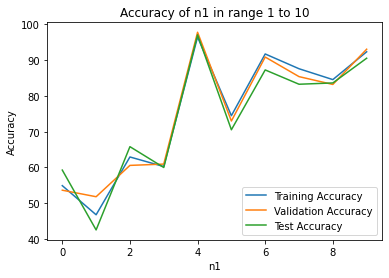

In [44]:
plt.figure()
plt.title('Accuracy of n1 in range 1 to 10')
plt.xlabel('n1')
plt.ylabel('Accuracy')
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(validation_acc_list, label='Validation Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.legend()
plt.show()

In [45]:
min_error_train = min(train_misc_rt_list)
min_error_valid = min(validation_misc_rt_list)
min_error_test = min(test_misc_rt_list)
print("The misclassification rate is minimum:",min_error_train, ",  for",train_misc_rt_list.index(min_error_train)+1,"neurons in 1-hidden layer model [Training set]")
print("The misclassification rate is minimum:",min_error_valid, ",  for",validation_misc_rt_list.index(min_error_valid)+1,"neurons in 1-hidden layer model [Validation set]")
print("The misclassification rate is minimum:",min_error_test, ",  for",test_misc_rt_list.index(min_error_test)+1,"neurons in 1-hidden layer model [Test set]")
print("")
max_train = max(train_acc_list)
max_valid = max(validation_acc_list)
max_test = max(test_acc_list)
print("The accuracy is maximum:",max_train, ",  for",train_acc_list.index(max_train)+1,"neurons in 1-hidden layer model [Training set]")
print("The accuracy is maximum:",max_valid, ",  for",validation_acc_list.index(max_valid)+1,"neurons in 1-hidden layer model [Validation set]")
print("The accuracy is maximum:",max_test, ",  for",test_acc_list.index(max_test)+1,"neurons in 1-hidden layer model [Test set]")
print("")
print("")
print("Choosing the least misclassification rate in [Validation Set] as the criteria, the best model for 1 hidden layer is with",validation_misc_rt_list.index(min_error_valid)+1,"neurons")

The misclassification rate is minimum: 0.03523693803159174 ,  for 5 neurons in 1-hidden layer model [Training set]
The misclassification rate is minimum: 0.021897810218978103 ,  for 5 neurons in 1-hidden layer model [Validation set]
The misclassification rate is minimum: 0.02909090909090909 ,  for 5 neurons in 1-hidden layer model [Test set]

The accuracy is maximum: 96.47630619684082 ,  for 5 neurons in 1-hidden layer model [Training set]
The accuracy is maximum: 97.8102189781022 ,  for 5 neurons in 1-hidden layer model [Validation set]
The accuracy is maximum: 97.0909090909091 ,  for 5 neurons in 1-hidden layer model [Test set]


Choosing the least misclassification rate in [Validation Set] as the criteria, the best model for 1 hidden layer is with 5 neurons


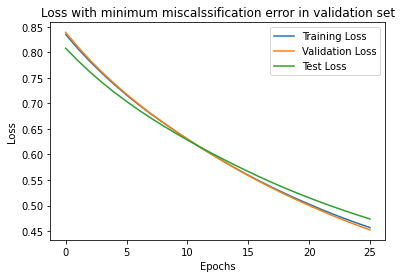

In [46]:
plt.figure()
plt.title('Loss with minimum miscalssification error in validation set')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(training_loss_list[validation_misc_rt_list.index(min_error_valid)], label='Training Loss')
plt.plot(validation_loss_list[validation_misc_rt_list.index(min_error_valid)], label='Validation Loss')
plt.plot(test_loss_list[validation_misc_rt_list.index(min_error_valid)], label='Test Loss')
plt.legend()

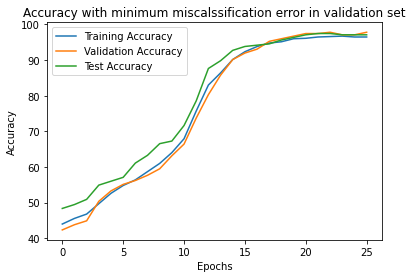

In [47]:
plt.figure()
plt.title('Accuracy with minimum miscalssification error in validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_accuracy_list[validation_misc_rt_list.index(min_error_valid)], label='Training Accuracy')
plt.plot(validation_accuracy_list[validation_misc_rt_list.index(min_error_valid)], label='Validation Accuracy')
plt.plot(test_accuracy_list[validation_misc_rt_list.index(min_error_valid)], label='Test Accuracy')
plt.legend()
plt.show()

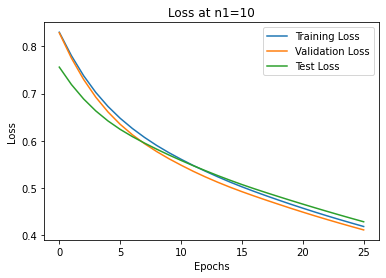

In [48]:
plt.figure()
plt.title('Loss at n1=10')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()

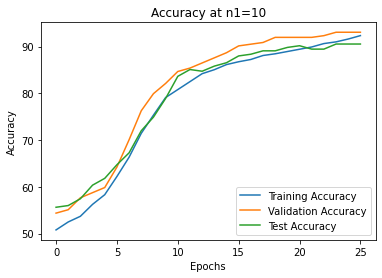

In [49]:
plt.figure()
plt.title('Accuracy at n1=10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()

In [50]:
#2 Hidden Layers Neural Network Model

In [51]:
def average_cross_entropy_loss2(Y, A, n, lyr2):
    ce = - (1 - Y) * np.log(1 - A) - Y * np.log(A) 
    ce = np.sum(ce) / n 
    ce =  ce / lyr2
    return ce

In [52]:
def accuracy2(A, Z, lyr2):
    A = binarize(A)
    B = np.equal(A, Z)
    B = B.sum()
    B = B / Z.shape[0]
    B = B * 100
    B = B / lyr2
    return B

In [53]:
def result2(A, B, dataset, lyr2):
    acc = accuracy2(A, B, lyr2)
    A = binarize(A)
    result = np.equal(A, B)
    misc = A[np.where(result == False)]
    misc = int(misc.size / lyr2)
    misc_rt = misc / B.size
    print(dataset,"accuracy:", acc, ";", "Number of misclassifications:", misc, ";", "Misclassification rate:", misc_rt)
    return (acc,misc_rt)

In [54]:
###Training###

In [55]:
training_loss_list = []
validation_loss_list = []
test_loss_list = []

training_accuracy_list = []
validation_accuracy_list = []
test_accuracy_list = []

train_acc_list=[]
validation_acc_list=[]
test_acc_list=[]

train_misc_rt_list=[]
validation_misc_rt_list=[]
test_misc_rt_list=[]

LAYERS=[]

alpha = 0.003
epochs = 2500
n = len(t_train)

#Condition n1+n2<=10
n1=10
n2=10

for p in range(1,n1+1):

  for q in range(1,n2+1):

    if(p+q<=10):

      LAYERS.append([p,q])

      lyr1=p
      lyr2=q

      layers = [4, lyr1, lyr2, 1]
      weights, biases = coeff(layers)

      training_loss = []
      validation_loss = []
      test_loss = []
      training_accuracy = []
      validation_accuracy = []
      test_accuracy = []

      train_acc=0
      validation_acc=0
      test_acc=0
      train_misc_rt=0
      validation_misc_rt=0
      test_misc_rt=0

      for i in range(epochs + 1):
        
        #forward propogation
        train_A1, train_A2, train_Z1, a = fwd2(weights, X_train, biases)
        b, validation_A2, c, d = fwd2(weights, X_valid, biases)
        e, test_A2, f, g = fwd2(weights, X_test, biases)

        if i % 100 == 0:          
          #accuracy and loss calculation
      
          #losses        
          training_loss.append(average_cross_entropy_loss2(t_train, train_A2, n, lyr2))
          validation_loss.append(average_cross_entropy_loss2(t_valid, validation_A2, len(t_valid),lyr2))
          test_loss.append(average_cross_entropy_loss2(t_test, test_A2, len(t_test),lyr2))
          
          #accuracy
          training_accuracy.append(accuracy2(train_A2, t_train,lyr2))
          validation_accuracy.append(accuracy2(validation_A2, t_valid,lyr2))
          test_accuracy.append(accuracy2(test_A2, t_test,lyr2))
        
        #backward propogation
        dL_dZ2, dL_dW2, dL_dB2 = bkwd(train_A1, train_A2, t_train, n)
        dL_dW1, dL_dB1 = bkwd2(weights, X_train, dL_dZ2, train_Z1, n)

        #updating
        gradients = (dL_dW1, dL_dW2, dL_dB1, dL_dB2)
        update_weights_biases(alpha, gradients, weights, biases)

        if i == epochs:
          print("n1 = ",p,",","n2 = ",q)
          #Results
          (train_acc,train_misc_rt) = result2(train_A2, t_train, 'Training', lyr2)
          (validation_acc,validation_misc_rt) = result2(validation_A2, t_valid, 'Validation', lyr2)
          (test_acc,test_misc_rt) = result2(test_A2, t_test, 'Test', lyr2)
          
          print("")
          
          train_acc_list.append(train_acc)
          validation_acc_list.append(validation_acc)
          test_acc_list.append(test_acc)
          
          train_misc_rt_list.append(train_misc_rt)
          validation_misc_rt_list.append(validation_misc_rt)
          test_misc_rt_list.append(test_misc_rt)
          
          training_loss_list.append(np.array(training_loss))
          validation_loss_list.append(np.array(validation_loss))
          test_loss_list.append(np.array(test_loss))

          training_accuracy_list.append(np.array(training_accuracy))
          validation_accuracy_list.append(np.array(validation_accuracy))
          test_accuracy_list.append(np.array(test_accuracy))

n1 =  1 , n2 =  1
Training accuracy: 90.40097205346294 ; Number of misclassifications: 79 ; Misclassification rate: 0.0959902794653706
Validation accuracy: 89.78102189781022 ; Number of misclassifications: 28 ; Misclassification rate: 0.10218978102189781
Test accuracy: 89.81818181818181 ; Number of misclassifications: 28 ; Misclassification rate: 0.10181818181818182

n1 =  1 , n2 =  2
Training accuracy: 96.47630619684082 ; Number of misclassifications: 29 ; Misclassification rate: 0.03523693803159174
Validation accuracy: 96.71532846715328 ; Number of misclassifications: 9 ; Misclassification rate: 0.032846715328467155
Test accuracy: 96.18181818181817 ; Number of misclassifications: 10 ; Misclassification rate: 0.03636363636363636

n1 =  1 , n2 =  3
Training accuracy: 54.921020656136086 ; Number of misclassifications: 371 ; Misclassification rate: 0.4507897934386391
Validation accuracy: 53.40632603406326 ; Number of misclassifications: 127 ; Misclassification rate: 0.4635036496350365
Te

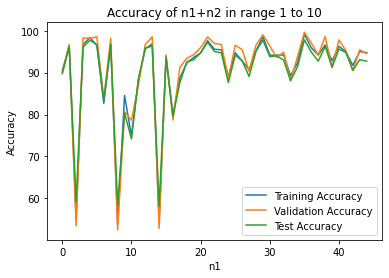

In [56]:
plt.figure()
plt.title('Accuracy of n1+n2 in range 1 to 10')
plt.xlabel('n1')
plt.ylabel('Accuracy')
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(validation_acc_list, label='Validation Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.legend()
plt.show()

In [57]:
min_error_train = min(train_misc_rt_list)
min_error_valid = min(validation_misc_rt_list)
min_error_test = min(test_misc_rt_list)
print("The misclassification rate is minimum:",min_error_train, ",  for",LAYERS[train_misc_rt_list.index(min_error_train)],"neurons in 2-hidden layer model [Training set]")
print("The misclassification rate is minimum:",min_error_valid, ",  for",LAYERS[validation_misc_rt_list.index(min_error_valid)],"neurons in 2-hidden layer model [Validation set]")
print("The misclassification rate is minimum:",min_error_test, ",  for",LAYERS[test_misc_rt_list.index(min_error_test)],"neurons in 2-hidden layer model [Test set]")
print("")
max_train = max(train_acc_list)
max_valid = max(validation_acc_list)
max_test = max(test_acc_list)
print("The accuracy is maximum:",max_train, ",  for",LAYERS[train_acc_list.index(max_train)],"neurons in 2-hidden layer model [Training set]")
print("The accuracy is maximum:",max_valid, ",  for",LAYERS[validation_acc_list.index(max_valid)],"neurons in 2-hidden layer model [Validation set]")
print("The accuracy is maximum:",max_test, ",  for",LAYERS[test_acc_list.index(max_test)],"neurons in 2-hidden layer model [Test set]")
print("")
print("")
print("Choosing the least misclassification rate in [Validation Set] as the criteria, the best model for 2 hidden layer is with",LAYERS[validation_misc_rt_list.index(min_error_valid)],"neurons")

The misclassification rate is minimum: 0.00850546780072904 ,  for [6, 1] neurons in 2-hidden layer model [Training set]
The misclassification rate is minimum: 0.0036496350364963502 ,  for [6, 1] neurons in 2-hidden layer model [Validation set]
The misclassification rate is minimum: 0.02181818181818182 ,  for [1, 5] neurons in 2-hidden layer model [Test set]

The accuracy is maximum: 99.1494532199271 ,  for [6, 1] neurons in 2-hidden layer model [Training set]
The accuracy is maximum: 99.63503649635037 ,  for [6, 1] neurons in 2-hidden layer model [Validation set]
The accuracy is maximum: 97.81818181818181 ,  for [6, 1] neurons in 2-hidden layer model [Test set]


Choosing the least misclassification rate in [Validation Set] as the criteria, the best model for 2 hidden layer is with [6, 1] neurons


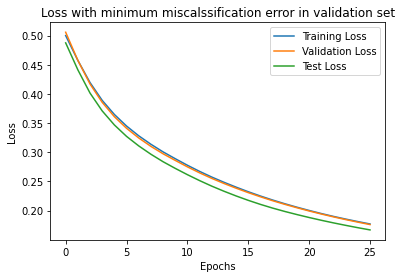

In [58]:
plt.figure()
plt.title('Loss with minimum miscalssification error in validation set')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(training_loss_list[validation_misc_rt_list.index(min_error_valid)], label='Training Loss')
plt.plot(validation_loss_list[validation_misc_rt_list.index(min_error_valid)], label='Validation Loss')
plt.plot(test_loss_list[validation_misc_rt_list.index(min_error_valid)], label='Test Loss')
plt.legend()

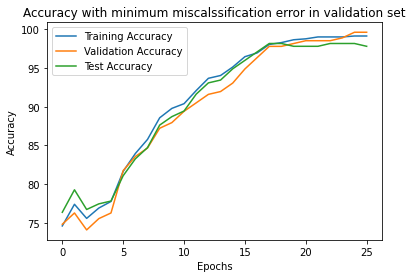

In [59]:
plt.figure()
plt.title('Accuracy with minimum miscalssification error in validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_accuracy_list[validation_misc_rt_list.index(min_error_valid)], label='Training Accuracy')
plt.plot(validation_accuracy_list[validation_misc_rt_list.index(min_error_valid)], label='Validation Accuracy')
plt.plot(test_accuracy_list[validation_misc_rt_list.index(min_error_valid)], label='Test Accuracy')
plt.legend()
plt.show()

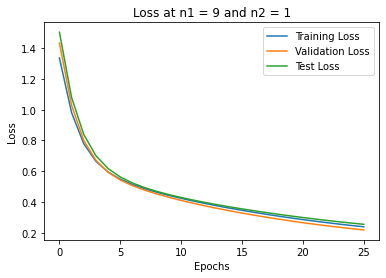

In [60]:
plt.figure()
plt.title('Loss at n1 = 9 and n2 = 1')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()

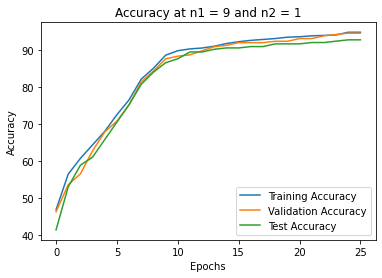

In [61]:
plt.figure()
plt.title('Accuracy at n1 = 9 and n2 = 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()